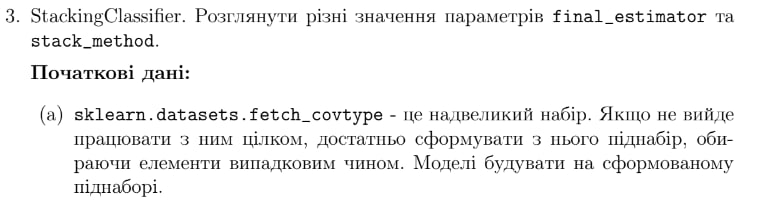

<font size=6> Дуже важливо! </font> <br>
Спочатку використовувалося 10% об'єктів з датасету, швидкість компіляції була дуже велика, але й показники метрик були набагато кращими (на ~0.15 для всіх), але на жаль результати були втрачені і потрібно було перезапустити код, і я прийняв рішення ще зменшити вибірку для навчання, що прискорило процес. Старий аналіз в більшості місць я залишив, адже для порівнянні результати підходять.

In [206]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
# для пошуку зміщення та дисперсії ми будемо використовувати бібліотеку mlxtend
# conda install -c conda-forge mlxtend
from mlxtend.evaluate import bias_variance_decomp


sns.set(rc={'figure.figsize':(14, 8)})

In [207]:
def scoring_and_matrix(y_true, y_predicted):
    confussion = metrics.confusion_matrix(y_true, y_predicted)
    sns.heatmap(confussion, annot=True, fmt='g', cmap='Blues')
    print(f'accuracy: {metrics.accuracy_score(y_true, y_predicted)} \n \
    precision: {metrics.precision_score(y_true, y_predicted, average="micro")} \n \
    recall: {metrics.recall_score(y_true, y_predicted, average="micro")} \n \
    f1_score: {metrics.f1_score(y_true, y_predicted, average="micro")}' )

In [208]:
def bias_var(bias, var):
    print(f'Bias: {bias}, var: {var}')

In [209]:
def gridsearchscore(classifier):
    print(f'Best score: {classifier.best_score_}, Best params: {classifier.best_params_}')

In [210]:
from sklearn.datasets import fetch_covtype

X_all_data, y_all_data = fetch_covtype(return_X_y=True, as_frame=True)

Оскільки це дуже великий датасет (581012 об'єктів, та 54 ознаки), то ми його зменшимо

In [211]:
from sklearn.model_selection import train_test_split

X_big, X, y_big, y = train_test_split(X_all_data, y_all_data, test_size=0.01, random_state=17)

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [213]:
X_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
420708,2899.0,13.0,13.0,467.0,80.0,1590.0,207.0,213.0,142.0,2886.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176503,2977.0,110.0,10.0,0.0,0.0,2616.0,237.0,230.0,123.0,361.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420168,2766.0,182.0,16.0,60.0,5.0,1618.0,223.0,249.0,153.0,2368.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
519456,3277.0,342.0,22.0,201.0,81.0,1689.0,168.0,200.0,167.0,2640.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496251,2944.0,32.0,18.0,150.0,40.0,2308.0,213.0,198.0,114.0,1774.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Розглянемо кореляцію ознак (Soil_type_ - відсутні на рисунку через те, що вони займають більшу частину малюнку і зрозуміло, що їх кореляція близька до нуля)

<AxesSubplot: >

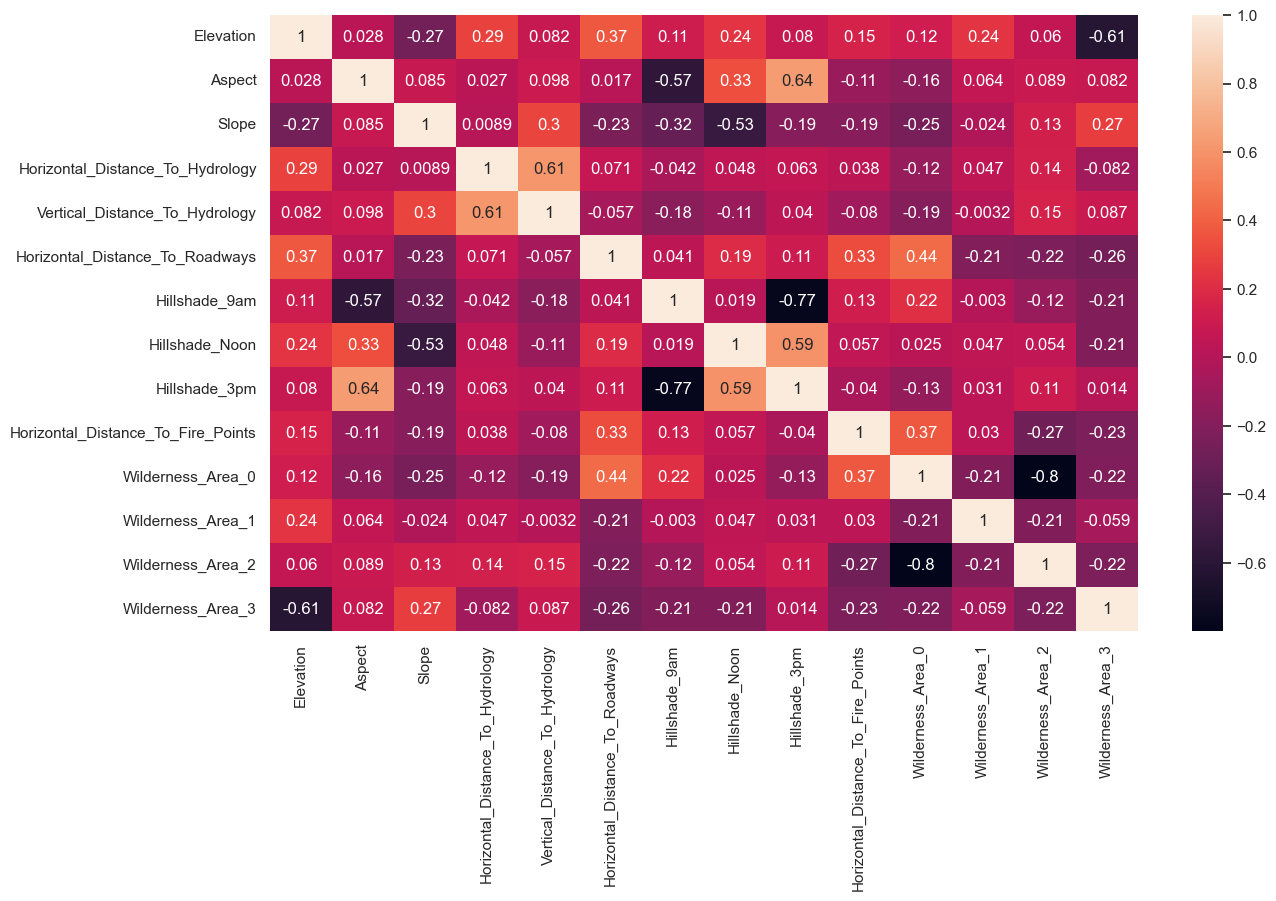

In [214]:
sns.heatmap(X_train.iloc[:, :14].corr(), annot=True)

Так, звісно малюнок не найкращої якості, але цього достатньо, щоб зрозуміти, що мультиколлінеарності немає

In [215]:
print(f'X shape: {X.shape}, y shape: {y.shape}')

X shape: (5811, 54), y shape: (5811,)


X_big та y_big (об'єкти які не потрапили у навчальну вибірку) можна використовувати як тестові вибірки

In [216]:
X.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,...,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2957.746859,154.144553,14.131647,265.642058,46.191705,2338.482189,212.354672,223.333678,142.246945,2011.764584,...,0.041645,0.084839,0.084151,0.002581,0.002925,0.000172,0.000172,0.027018,0.023404,0.012046
std,278.114485,111.531310,7.417896,211.864326,57.925482,1554.232821,26.926828,19.630932,38.079310,1340.761231,...,0.199794,0.278666,0.277638,0.050745,0.054013,0.013118,0.013118,0.162149,0.151196,0.109101
min,1876.000000,0.000000,0.000000,0.000000,-137.000000,0.000000,0.000000,112.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2808.000000,58.000000,9.000000,108.000000,7.000000,1082.000000,198.000000,213.000000,119.000000,1041.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,124.000000,13.000000,212.000000,29.000000,1999.000000,218.000000,226.000000,142.000000,1747.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3159.500000,255.000000,18.000000,379.000000,68.000000,3327.000000,232.000000,237.000000,167.000000,2581.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3843.000000,359.000000,52.000000,1361.000000,406.000000,6908.000000,254.000000,254.000000,244.000000,6929.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Оскільки ми маємо 54 ознаки, то візуалізації не буде

<font size="5">Для початку ми спробуємо підібрати estimators:</font> <br>
В нас будут такі комбінації на перевірку:
1. RandomForest() та SVC(kernel='linear')
2. RandomForest() та MLPClassifier()
3. SVC(kernel='linear') та MLPClassifier()
4. RandomForest(), SVC(kernel='linear') та MLPClassifier() (усі разом) <br>

Використовується SVC(kernel='linear'), а не LinearSVC(), тому що у LinearSVC() немає параметру probability, а він буде потрібен у GridSearchCV для параметру stack_method = 'predict_proba'


<font size="5">RandomForest() та SVC(kernel='linear'):</font>

In [217]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


estimators = [
    ('rf', RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=17)),
    ('svс', make_pipeline(StandardScaler(),
                          SVC(kernel='linear', probability=True, random_state=17)))
]

classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

In [218]:
classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=20,
                                                       n_jobs=-1,
                                                       random_state=17)),
                               ('svс',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(kernel='linear',
                                                     probability=True,
                                                     random_state=17))]))],
                   final_estimator=LogisticRegression(max_iter=1000),
                   n_jobs=-1)

accuracy: 0.9870912220309811 
     precision: 0.9870912220309811 
     recall: 0.9870912220309811 
     f1_score: 0.9870912220309811


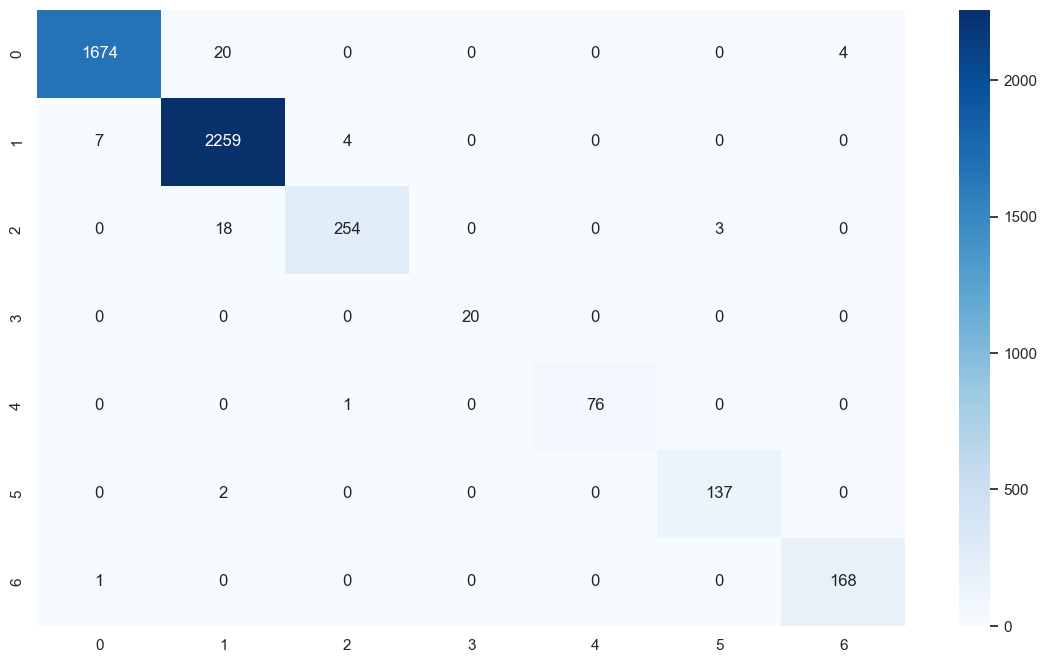

In [219]:
y_predict = classifier.predict(X_train)

scoring_and_matrix(y_train, y_predict)

accuracy: 0.7781599312123818 
     precision: 0.7781599312123818 
     recall: 0.7781599312123818 
     f1_score: 0.7781599312123818


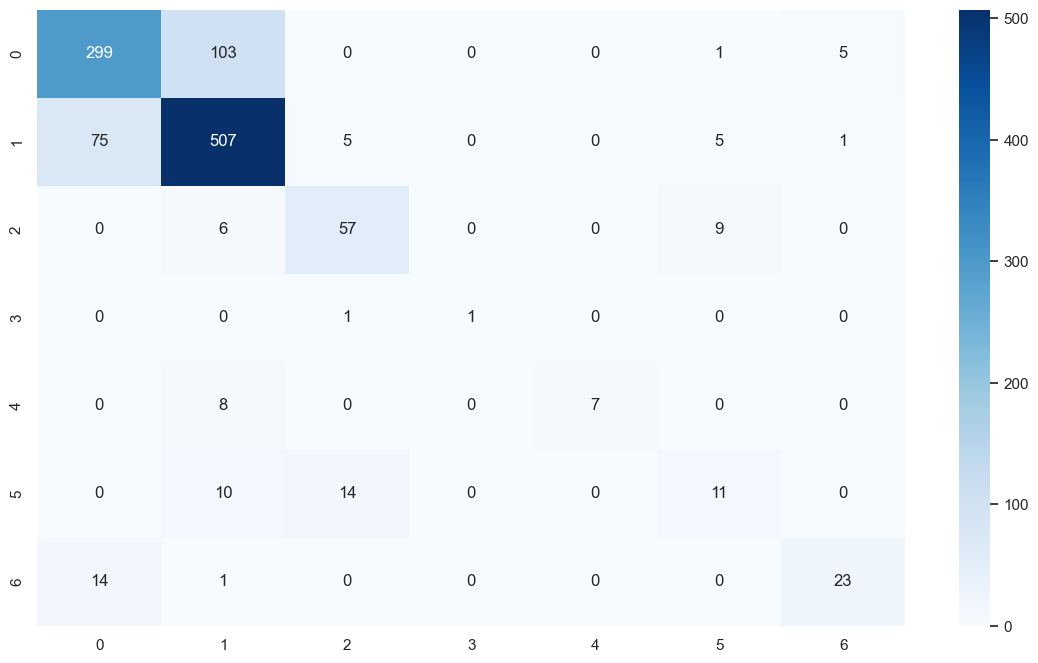

In [220]:
y_predict = classifier.predict(X_test)

scoring_and_matrix(y_test, y_predict)

<font size="5">RandomForest() та MLPClassifier():</font>

In [248]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=17)),
    ('mlp', make_pipeline(StandardScaler(),
                          MLPClassifier(hidden_layer_sizes=(15, 10))))
]

classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

In [249]:
classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=20,
                                                       n_jobs=-1,
                                                       random_state=17)),
                               ('mlp',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('mlpclassifier',
                                                 MLPClassifier(hidden_layer_sizes=(15,
                                                                                   10)))]))],
                   final_estimator=LogisticRegression(max_iter=1000),
                   n_jobs=-1)

accuracy: 0.9832185886402753 
     precision: 0.9832185886402753 
     recall: 0.9832185886402753 
     f1_score: 0.9832185886402753


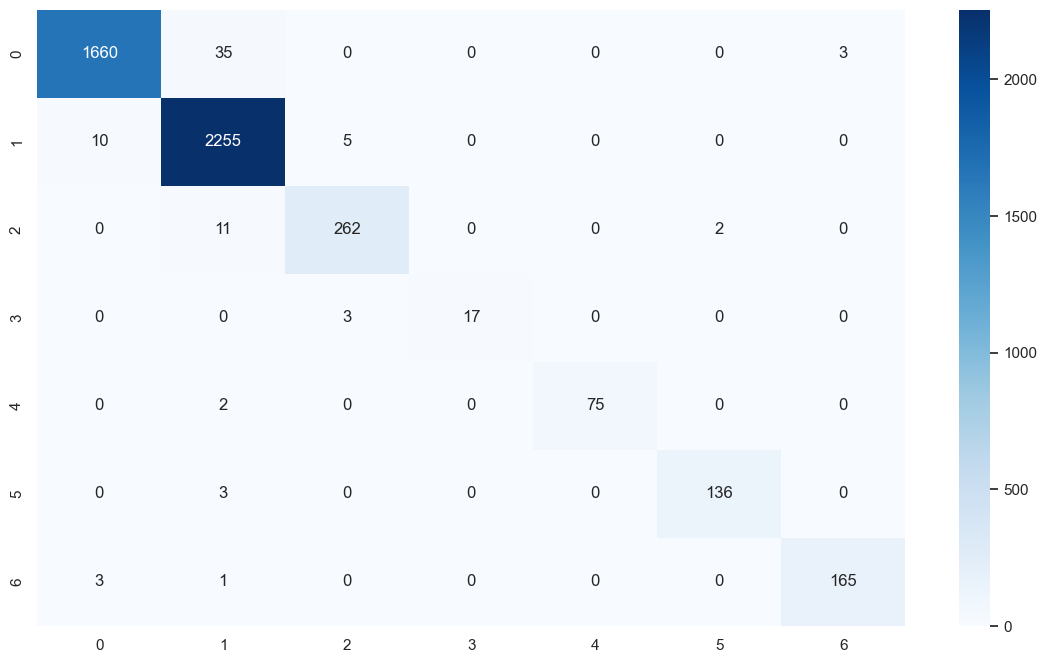

In [250]:
y_predict = classifier.predict(X_train)

scoring_and_matrix(y_train, y_predict)

accuracy: 0.7790197764402408 
     precision: 0.7790197764402408 
     recall: 0.7790197764402408 
     f1_score: 0.7790197764402408


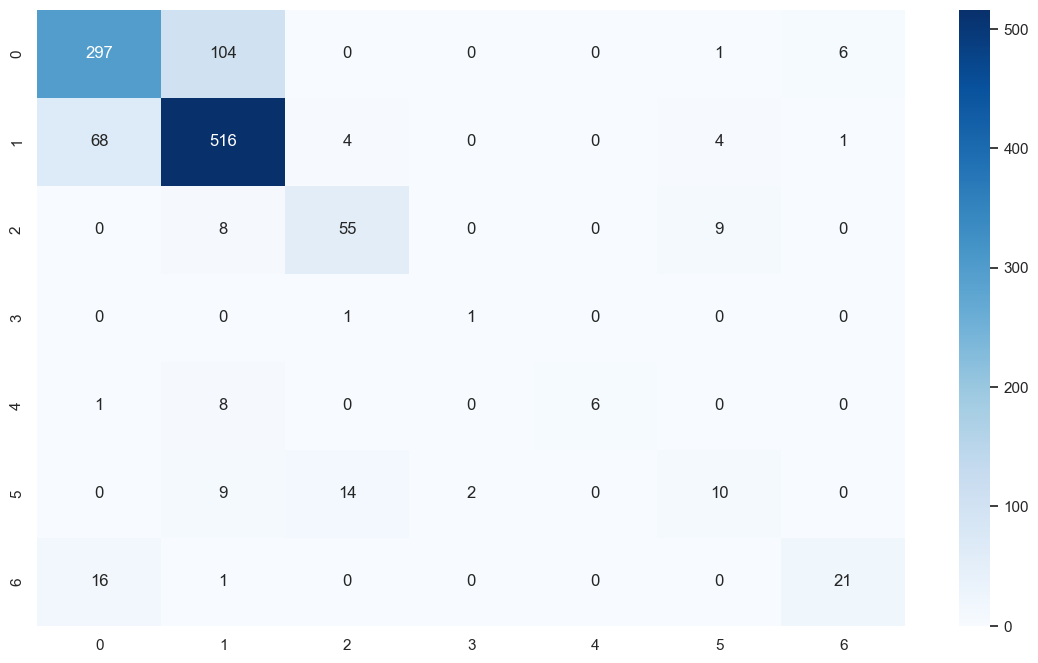

In [251]:
y_predict = classifier.predict(X_test)

scoring_and_matrix(y_test, y_predict)

<font size="5">SVC(kernel='linear') та MLPClassifier():</font>

In [225]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=17)),
    ('svс', make_pipeline(StandardScaler(),
                          SVC(kernel='linear', probability=True, random_state=17)))
]

classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

In [226]:
classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=20,
                                                       n_jobs=-1,
                                                       random_state=17)),
                               ('svс',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(kernel='linear',
                                                     probability=True,
                                                     random_state=17))]))],
                   final_estimator=LogisticRegression(max_iter=1000),
                   n_jobs=-1)

accuracy: 0.9870912220309811 
     precision: 0.9870912220309811 
     recall: 0.9870912220309811 
     f1_score: 0.9870912220309811


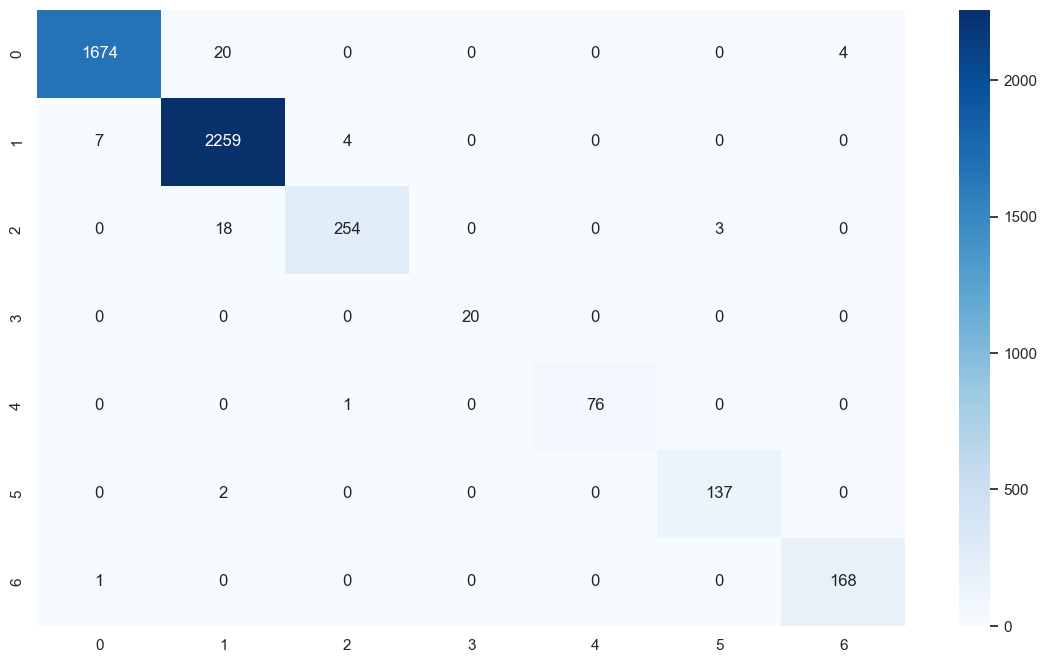

In [227]:
y_predict = classifier.predict(X_train)

scoring_and_matrix(y_train, y_predict)

accuracy: 0.7781599312123818 
     precision: 0.7781599312123818 
     recall: 0.7781599312123818 
     f1_score: 0.7781599312123818


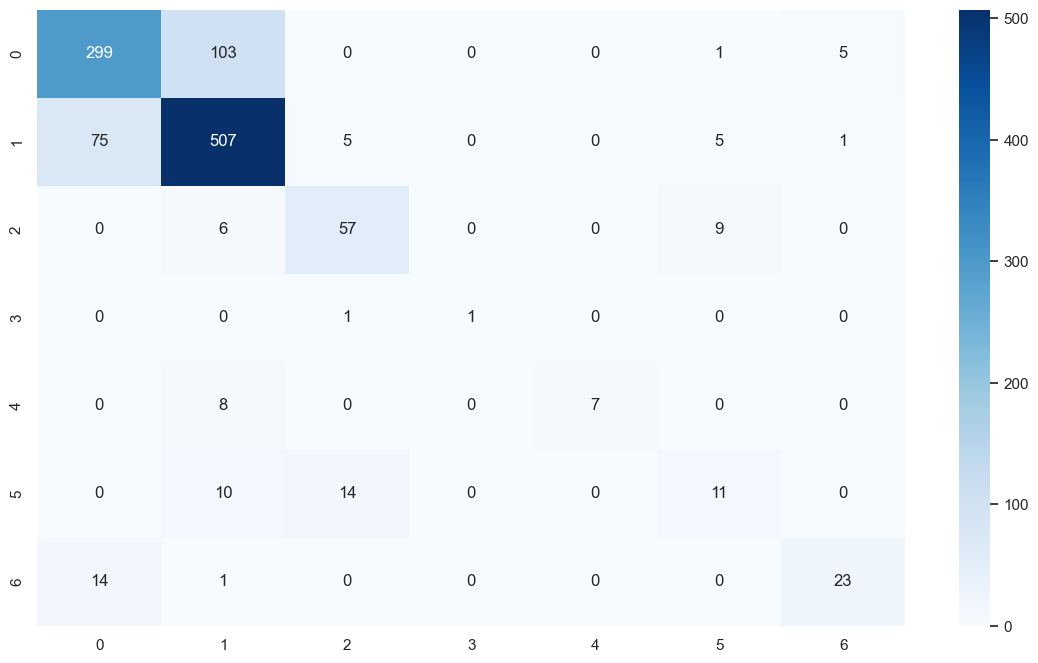

In [228]:
y_predict = classifier.predict(X_test)

scoring_and_matrix(y_test, y_predict)

<font size="5">RandomForest(), SVC(kernel='linear') та MLPClassifier() (усі разом):</font>

In [229]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=17)),
    ('svс', make_pipeline(StandardScaler(),
                          SVC(kernel='linear', probability=True, random_state=17))),
    ('mlp', make_pipeline(StandardScaler(),
                          MLPClassifier(hidden_layer_sizes=(15, 10))))
]

classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

In [230]:
classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=20,
                                                       n_jobs=-1,
                                                       random_state=17)),
                               ('svс',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(kernel='linear',
                                                     probability=True,
                                                     random_state=17))])),
                               ('mlp',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('mlpclassifier',
                                                 MLPClassifier(hidden_layer_sizes=(15,
                                                                                   10)))]))],
                   final_estimator=LogisticRegression(max_iter=1000),
                   n_jobs=-1)

accuracy: 0.9763339070567987 
     precision: 0.9763339070567987 
     recall: 0.9763339070567987 
     f1_score: 0.9763339070567987


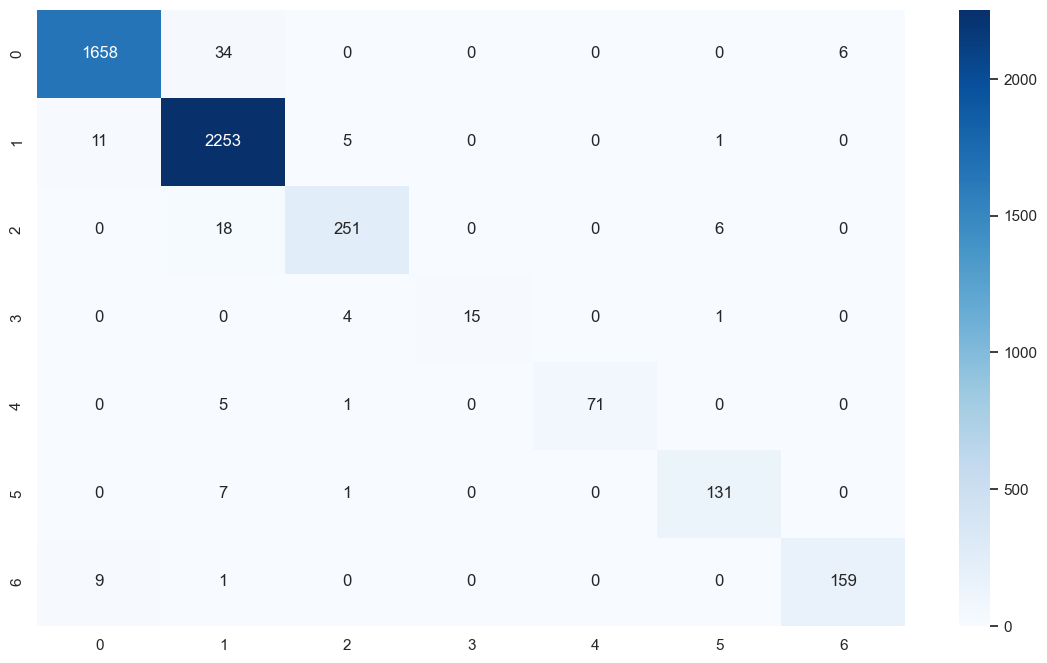

In [231]:
y_predict = classifier.predict(X_train)

scoring_and_matrix(y_train, y_predict)

accuracy: 0.7833190025795357 
     precision: 0.7833190025795357 
     recall: 0.7833190025795357 
     f1_score: 0.7833190025795358


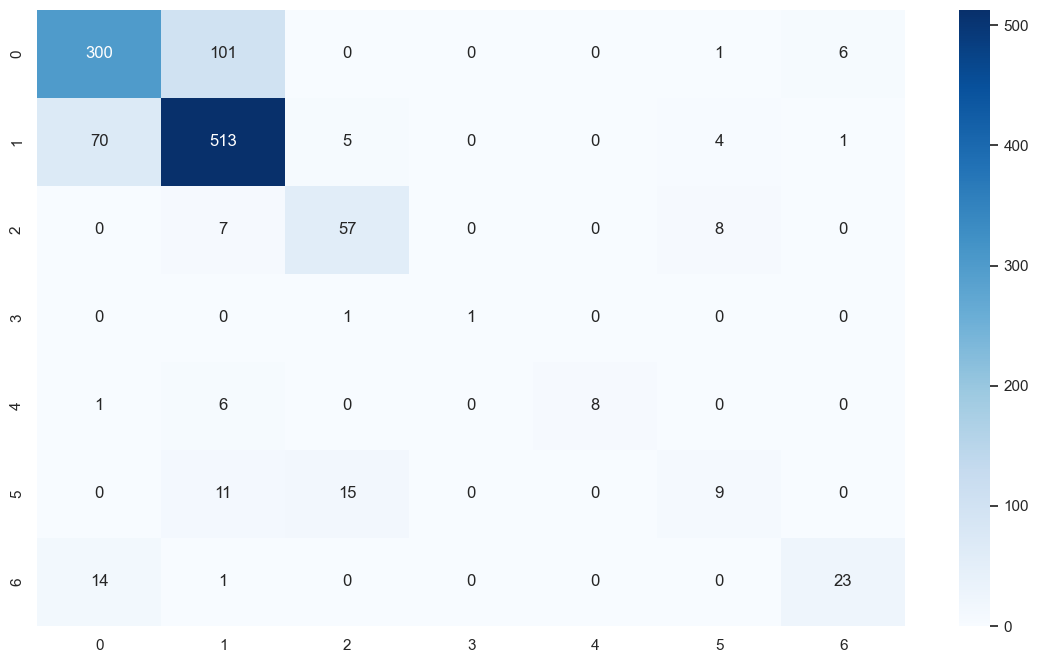

In [232]:
y_predict = classifier.predict(X_test)

scoring_and_matrix(y_test, y_predict)

Для наступного підбору гіперпараметрів ми будемо використовувати stack з усіх трьох моделей (RandomForest(), SVC(kernel='linear') та MLPClassifier()), тому що порівнянно час навчання схожийй до інших, а значення метрик - найкраще <br>
Тому зараз ми дізнаємося значення метрик на великому наборі

accuracy: 0.7706227909895845 
     precision: 0.7706227909895845 
     recall: 0.7706227909895845 
     f1_score: 0.7706227909895845


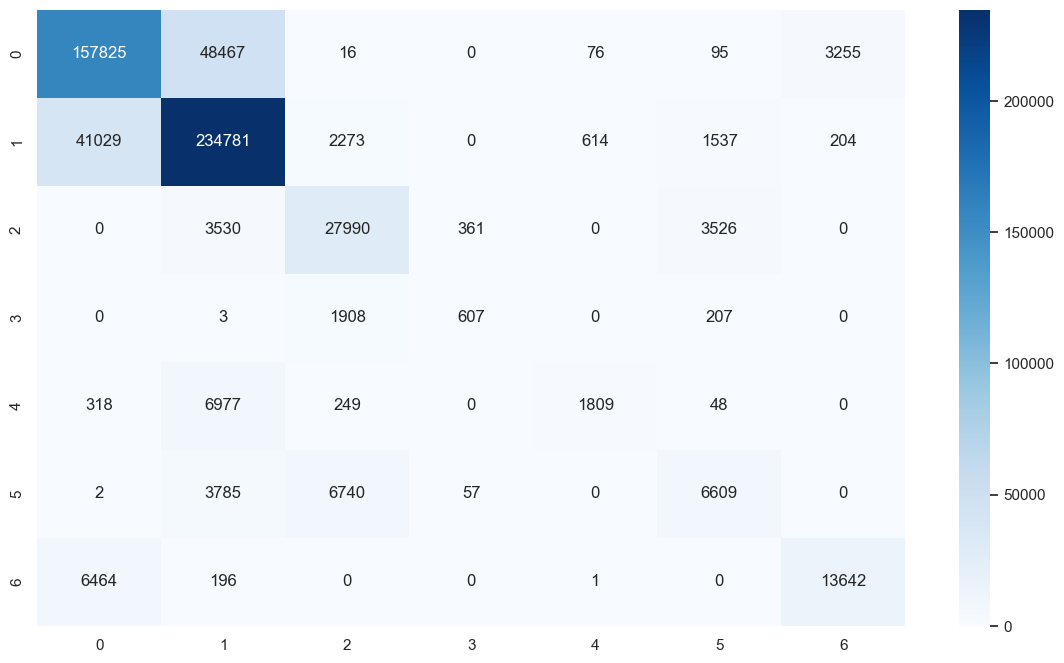

In [233]:
y_predict = classifier.predict(X_big)

scoring_and_matrix(y_big, y_predict)

Як різні значення final_estimator будемо використовувати: LogisticRegression() (default), DecisionTreeClassifier() LinearSVC() <br>
stack_method: 'auto', 'predict_proba', 'decision_function', 'predict'

In [234]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


parameters = {
    'final_estimator': [LogisticRegression(), DecisionTreeClassifier(), SVC(kernel='linear', random_state=17)],
    'stack_method': ['auto', 'predict_proba', 'decision_function', 'predict']
    }

grid_search = GridSearchCV(classifier, parameters, scoring='accuracy', n_jobs=-1, cv=5)

In [235]:
grid_search.fit(X_train, y_train)

c:\Users\Kidma\anaconda3\envs\epam\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kidma\anaconda3\envs\epam\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Kidma\anaconda3\envs\epam\lib\site-packages\sklearn\ensemble\_stacking.py", line 584, in fit
    return super().fit(X, self._le.transform(y), sample_weight)
  File "c:\Users\Kidma\anaconda3\envs\epam\lib\site-packages\sklearn\ensemble\_stacking.py", line 207, in fit
    se

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('rf',
                                                       RandomForestClassifier(n_estimators=20,
                                                                              n_jobs=-1,
                                                                              random_state=17)),
                                                      ('svс',
                                                       Pipeline(steps=[('standardscaler',
                                                                        StandardScaler()),
                                                                       ('svc',
                                                                        SVC(kernel='linear',
                                                                            probability=True,
                                                                            random_state=17))])),
                                                      ('mlp',
                                                       Pipeline(steps=[('standardscaler',
                                                                        StandardScaler()),
                                                                       ('mlpclassifier',
                                                                        MLPClassifier(hidden_layer_sizes=(15,
                                                                                                          10)))]))],
                                          final_estimator=LogisticRegression(max_iter=1000),
                                          n_jobs=-1),
             n_jobs=-1,
             param_grid={'final_estimator': [LogisticRegression(),
                                             DecisionTreeClassifier(),
                                             SVC(kernel='linear',
                                                 random_state=17)],
                         'stack_method': ['auto', 'predict_proba',
                                          'decision_function', 'predict']},
             scoring='accuracy')

Ми отримали цю помилку тому що RandomForest немає методу decison_function, я вирішив вже не змінювати один з класифікаторів

In [236]:
gridsearchscore(grid_search)

Best score: 0.7583932312464554, Best params: {'final_estimator': LogisticRegression(), 'stack_method': 'predict_proba'}


accuracy: 0.9795611015490534 
     precision: 0.9795611015490534 
     recall: 0.9795611015490534 
     f1_score: 0.9795611015490534


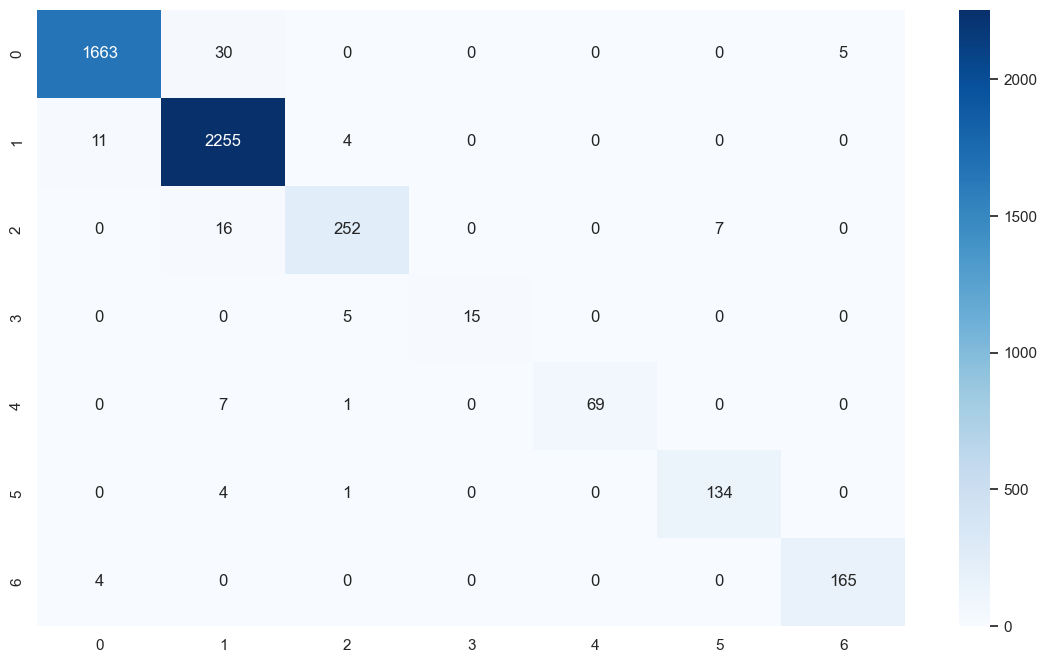

In [237]:
y_predict = grid_search.predict(X_train)

scoring_and_matrix(y_train, y_predict)

accuracy: 0.7790197764402408 
     precision: 0.7790197764402408 
     recall: 0.7790197764402408 
     f1_score: 0.7790197764402408


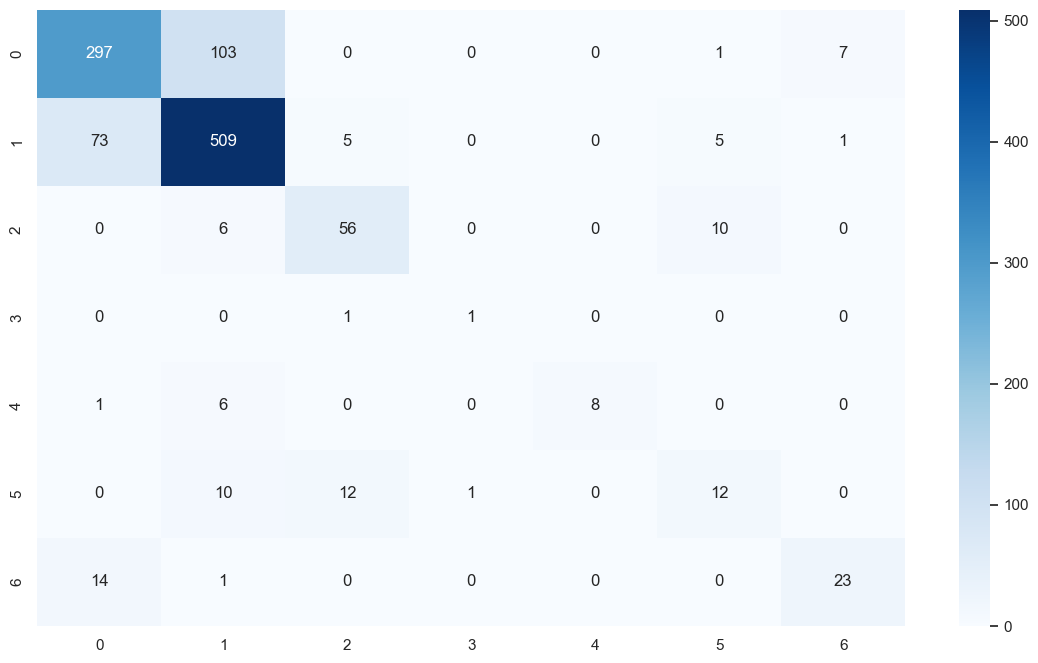

In [238]:
y_predict = grid_search.predict(X_test)

scoring_and_matrix(y_test, y_predict)

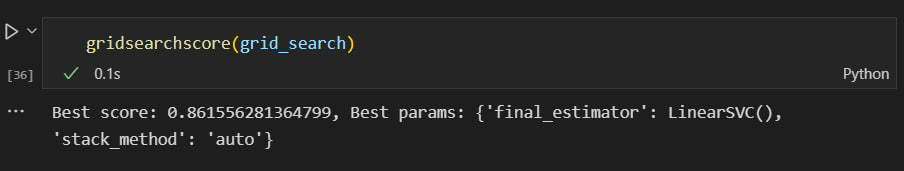

Хоча модель і декілька разів не змогла довчитися, але ми отримали значення метрик краще (на 0.002), це заняло більше двох годин, цей блок я залишу на випадок якщо потрібно буде перезапустити (зверху параметри які дав решітчастий пошук як найкращі)

accuracy: 0.7707427490564168 
     precision: 0.7707427490564168 
     recall: 0.7707427490564168 
     f1_score: 0.7707427490564168


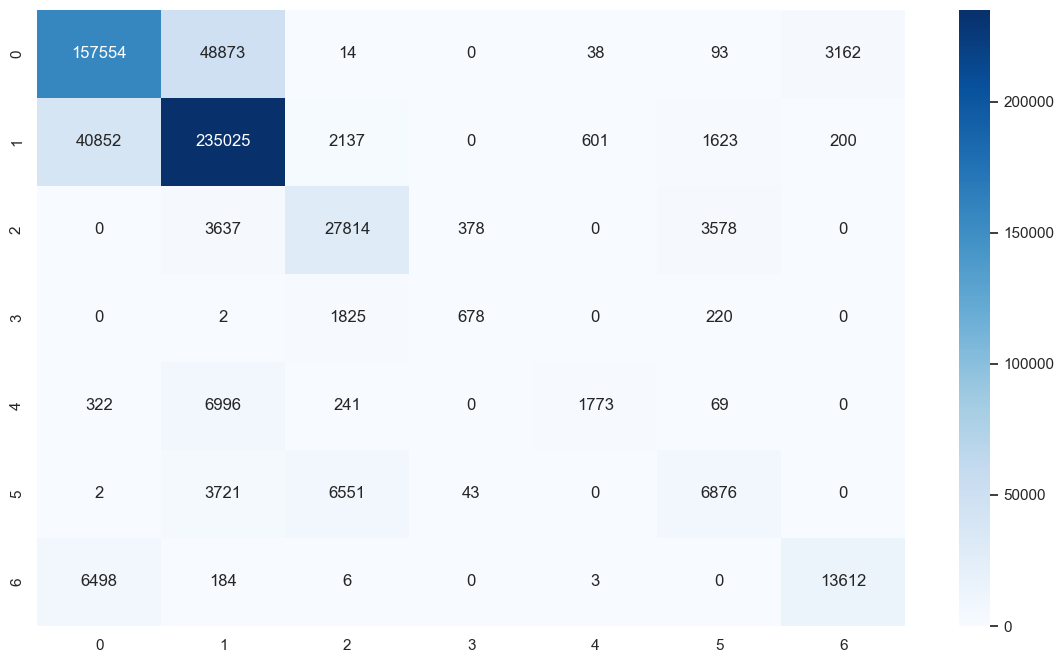

In [239]:
y_predict = grid_search.predict(X_big)

scoring_and_matrix(y_big, y_predict)

Ансамбль з налаштованими гіперпараметрами показав себе майже так само як і без налаштування гіперпараметрів (RandomForest(), SVC(kernel='linear') та MLPClassifier() (усі разом))

Дізнаємося зміщення та дисперсію:

In [240]:
# estimators = [
#     ('rf', RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=17)),
#     ('svс', make_pipeline(StandardScaler(),
#                           LinearSVC(random_state=17, max_iter=2000))),
#     ('mlp', make_pipeline(StandardScaler(),
#                           MLPClassifier(hidden_layer_sizes=(15, 10))))
# ]

# best_estimator = StackingClassifier(estimators=estimators, final_estimator=LinearSVC(max_iter=2000), n_jobs=-1)

In [241]:
# mse, bias, var = bias_variance_decomp(best_estimator, X_train.values, \
#     y_train.values, X_test.values, y_test.values, random_seed=17)

Дисперсія та зміщення для цієї моделі жодного разу не дорахувалася, навіть на низькій кількості даних я отримував помилку: "Liblinear failed to converge, increase the number of iterations.", збільшення max_iter на обох класифікаторах (final та у стеку) привели тільки до збільшення часу роботи. <br>
На жаль на цей пункт відповісти я не зможу

Як одну модель з якою будемо порівнювати ми будемо брати MLPClassifier() з розміром скритих шарів (15, 10)

In [242]:
mlp = MLPClassifier(hidden_layer_sizes=(15, 10))

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(15, 10))

accuracy: 0.6538296041308089 
     precision: 0.6538296041308089 
     recall: 0.6538296041308089 
     f1_score: 0.6538296041308089


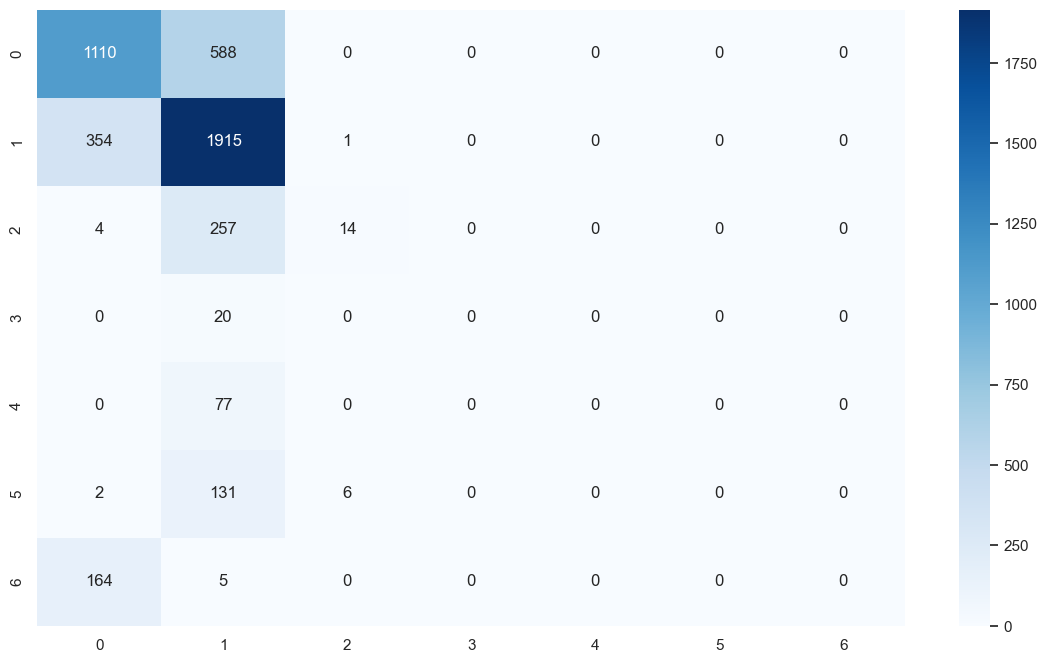

In [243]:
y_predict = mlp.predict(X_train)

scoring_and_matrix(y_train, y_predict)

accuracy: 0.6672398968185727 
     precision: 0.6672398968185727 
     recall: 0.6672398968185727 
     f1_score: 0.6672398968185727


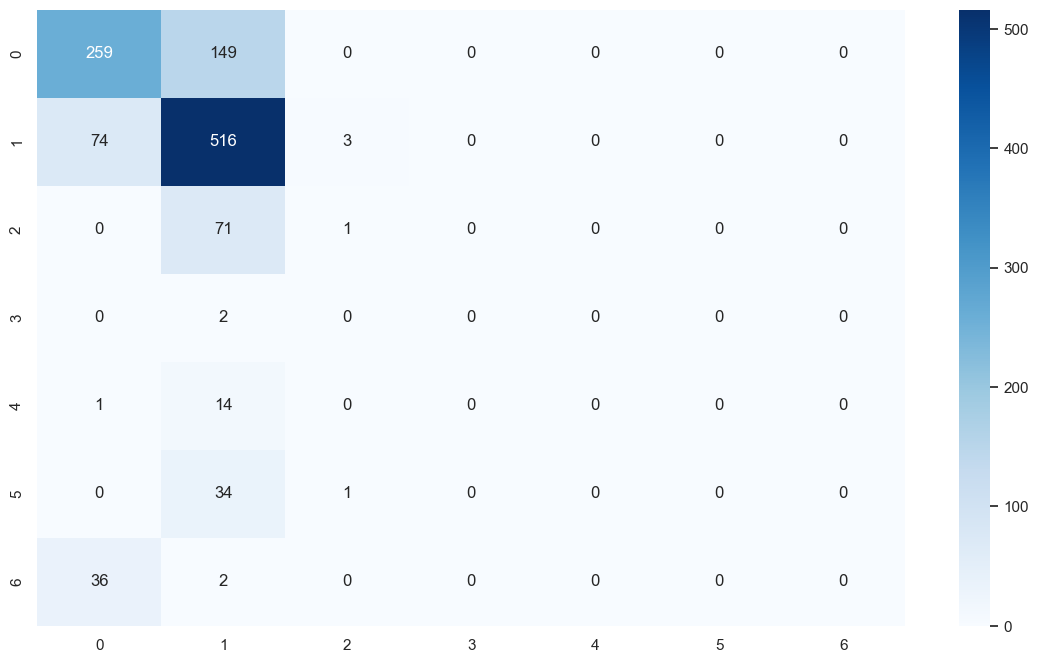

In [246]:
y_predict = mlp.predict(X_test)

scoring_and_matrix(y_test, y_predict)

accuracy: 0.650570843931078 
     precision: 0.650570843931078 
     recall: 0.650570843931078 
     f1_score: 0.650570843931078


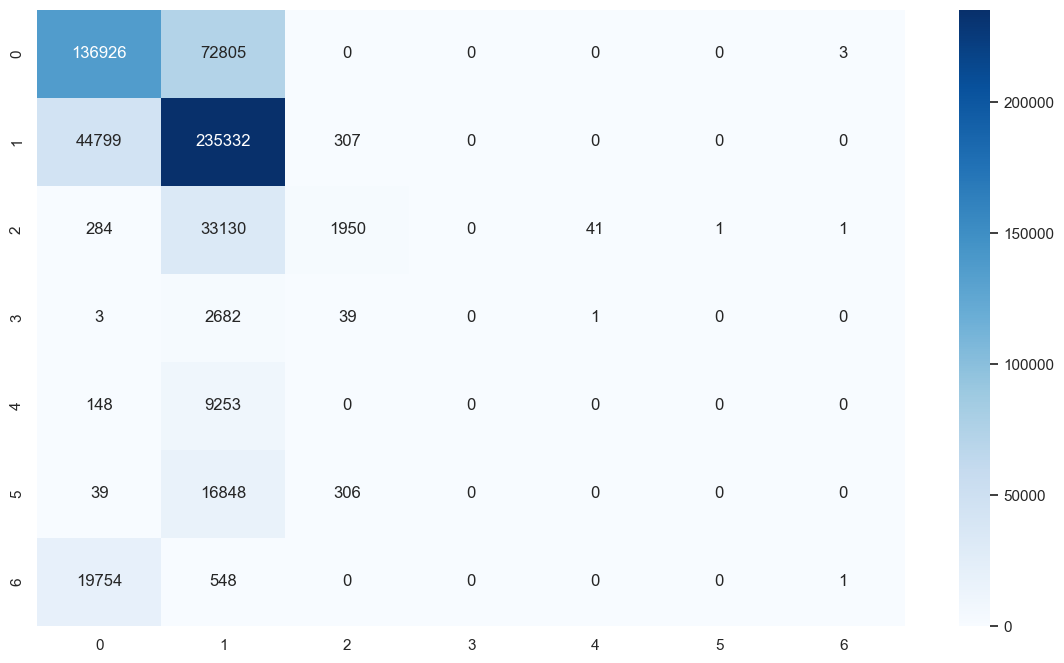

In [247]:
y_predict = mlp.predict(X_big)

scoring_and_matrix(y_big, y_predict)

Ми побачили велику різницю між двохшаровим персептроном та ансамблем, 0.12 для accuracy_score (де ансамбль виявився кращим) <br>
Час навчання моделі дуже великий, навіть з ~6000 об'єктів, про початкові ~60000 я навіть писати не хочу, хоча витрачений час був того вартий, ми отримали значення метрик більше ~0.85 для всіх ансамблів<br>
Значення зміщення та дисперсії для моделі та ансамблю я на жаль порахувати не зміг

<font size=5> Висновок: </font> <br>
На цьому датасеті ансамблю показав себе краще ніж двохшаровий персептрон, можливо якась інша індивідуальна модель змогла б себе показати на рівні, але я не певен у цьому, загалом цей ансамбль вчиться дуже довго, але при достатній кількості даних для навчання і гарному підборі класифікаторів для стеку може бути чи не найпотужнішим алгоритмом машинного навчання (на мою думку)